In [18]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import Maze_env.wrappers.rewards as rw
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [19]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

In [20]:


dataset.show_maze(0)

<IPython.core.display.Javascript object>

In [21]:
%matplotlib notebook

# -- reward distribution for this agent -- #
rewards = rw.reward_dist(GOAL = 50.0,
                         SEE_GOAL = 0.05,
                         DONT_SEE_GOAL = -0.01,
                         NEW_PLACE = 0.05,
                         OLD_PLACE = -0.5,
                         GET_CLOSER = 7.0,
                         GET_CLOSER_CONSTANT = 3.0,
                         GET_FARTHER = -0.00,
                         GET_FARTHER_CONSTANT = -0.1,
                         DIST = 0.0)


# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal',
                               rewards_dist=rewards)

# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test10',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=50,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              n_frames = 500000,
                              lr = 0.0005,
                              lr_step_size=10000,
                              lr_gamma = 0.99,
                              replay_buffer_size=100000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 500000,
                              per = True,
                              curriculum=False
                              )
train.train(test_agent=True,peak=False,uniform_loc=False)
train.save()

<IPython.core.display.Javascript object>

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


frame 10000 with loss 24.78798484802246
Epsilon: [0.9999953948404178]
Epsilon Level: 1
Start dist: 5
Current Score: 0.238
cumulative reward: [26.18222222]
cumulative reward: [-28.11755024]
cumulative reward: [-31.27910165]
cumulative reward: [26.18222222]
cumulative reward: [-24.66132388]
frame 20000 with loss 0.7082076072692871
Epsilon: [0.9549881881281775]
Epsilon Level: 1
Start dist: 5
Current Score: 0.324
frame 30000 with loss 1.5501006841659546
Epsilon: [0.9120066394004538]
Epsilon Level: 1
Start dist: 5
Current Score: 0.256
cumulative reward: [26.18222222]
cumulative reward: [-28.10571789]
cumulative reward: [-31.27910165]
cumulative reward: [-24.66132388]
cumulative reward: [-31.27910165]
frame 40000 with loss 1.6976526975631714
Epsilon: [0.8709595790297586]
Epsilon Level: 1
Start dist: 5
Current Score: 0.248
Current Score: 0.196
cumulative reward: [25.85333333]
cumulative reward: [-31.27910165]
cumulative reward: [-21.19910165]
cumulative reward: [-31.27910165]
cumulative rewar

KeyboardInterrupt: 

In [9]:
train.save()

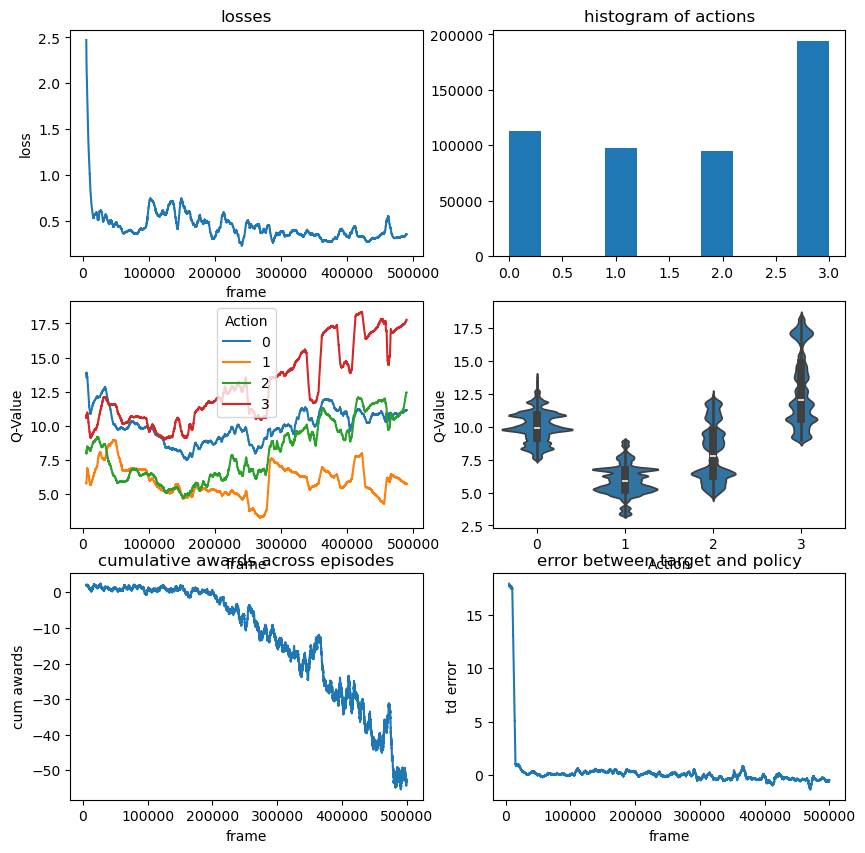

In [ ]:
train.results()

In [ ]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_agents=1,start_dist=1)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


0.339

In [12]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset[0],num_agents=1,len_game=15,epsilon=0,sample_prob=False,agents_pos=None,targets_pos=None)


cumulative reward: [9.48089835]


In [ ]:
import DQN.agent as agent

load = agent.maze_agents.load('test1')

FileNotFoundError: [Errno 2] No such file or directory: '/home/cody/Documents/DataSciBC/Generative_AI/maze_game/trained_agents/test1/model_hyperparameters.json'

In [9]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [ ]:
load.run_agent(testing_dataset[0],len_game=15,n_episodes=1,agents_pos = None, targets_pos =None)

cumulative reward: [-11.55]


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [7]:
# Here we are going to take a recent model and try to use that as a starting
# point for training in a bigger arena.

%matplotlib notebook

# -- maze dataset -- #
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

# -- reward distribution for this agent -- #
rewards = rw.reward_dist(GOAL = 10.0,
                         SEE_GOAL = 0.6,
                         DONT_SEE_GOAL = -0.0,
                         NEW_PLACE = 5.0,
                         OLD_PLACE = -0.08,
                         GET_CLOSER = 0.5,
                         GET_FARTHER = -0.5,
                         DIST = 0.0)


# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents.load('best_2x2_100%')

# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test4',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.99,
                              tau = 0.001,
                               batch_size = 64,
                              n_frames = 100000,
                              lr = 0.0025,
                              lr_step_size=10000,
                              lr_gamma = 0.1,
                              replay_buffer_size=50000,
                              replay_buffer_min_perc=0.1,
                              target_update=1000,
                              policy_update=1,
                              lambda_entropy=0.4,
                              beta = 0.4,
                              alpha = 0.6,
                              decay = 0.9,
                              per = True
                              )
train.train(test_agent=True,peak=False,uniform_loc=True)
train.save()


<IPython.core.display.Javascript object>

frame 10000 with loss 139.1195068359375
cumulative reward: [0.74165958]
cumulative reward: [2.41977122]
cumulative reward: [0.5343688]
cumulative reward: [1.25721513]
cumulative reward: [1.01982972]
frame 20000 with loss 103.98388671875
frame 30000 with loss 218.9993896484375
cumulative reward: [2.68318204]
cumulative reward: [0.5343688]
cumulative reward: [1.64666667]
cumulative reward: [2.35284634]
cumulative reward: [2.41977122]
frame 40000 with loss 42.540687561035156
frame 50000 with loss 226.40924072265625
frame 60000 with loss 141.74012756347656
cumulative reward: [1.64666667]
cumulative reward: [2.35284634]
cumulative reward: [1.25721513]
cumulative reward: [1.64666667]
cumulative reward: [1.64666667]
frame 70000 with loss 45.16960525512695
frame 80000 with loss 384.1902770996094
frame 90000 with loss 349.89666748046875
frame 100000 with loss 781.2708129882812


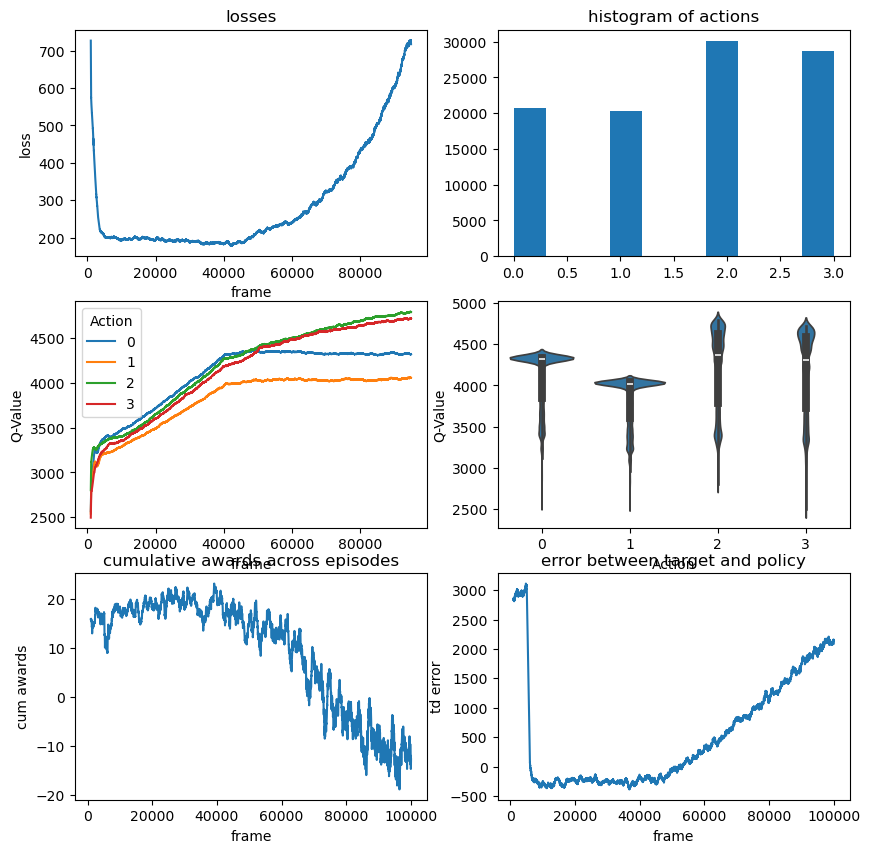

In [3]:
train.results()

In [4]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_agents=1)

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


0.365

In [ ]:
train.agents.run_agent(dataset[0],num_agents=1,len_game=15,epsilon=0,sample_prob=False,agents_pos=None,targets_pos=None)

KeyboardInterrupt: 